In [124]:
import FileOpener.new_backtest as newb
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False
## 글씨체 바꿀 것(KB국민체)
mpl.rcParams["font.family"] = 'KBFG Text'
mpl.rcParams["font.size"] = 20
mpl.rcParams["figure.figsize"] = (14,7)

In [125]:
dt = pd.read_csv('CSVFile/Price/Korea/Index/MKF_STYLE.csv'
                 , encoding='cp949', index_col = 'Frequency')
dt.index = pd.to_datetime(dt.index)

bm = dt['MKF500']
style = dt.loc[:,'순수가치':]

## 수익률 산출

### Monthly Return

### Daily Return

In [134]:
import numpy as np

def ret(index):
    
    return (index.pct_change().dropna(axis = 0, how = 'all')).sub(-1)

def monthly_return(index):
    
    index_ret = ret(index)
    month_index_ret = index_ret.resample('M').prod()
    month_index_ret[month_index_ret == 1.0] = np.nan        
    
    return month_index_ret

bm_rt = ret(bm)
style_rt = ret(style)

## Size Factor: 소형주 Long, 대형주 Short
style_rt['Size'] = (style_rt['소형주'] - style_rt['대형주']) + 1

bm_monthly_rt = monthly_return(bm)
style_monthly_rt = monthly_return(style)

### Size Factor / 소형주 Long, 대형주 Short

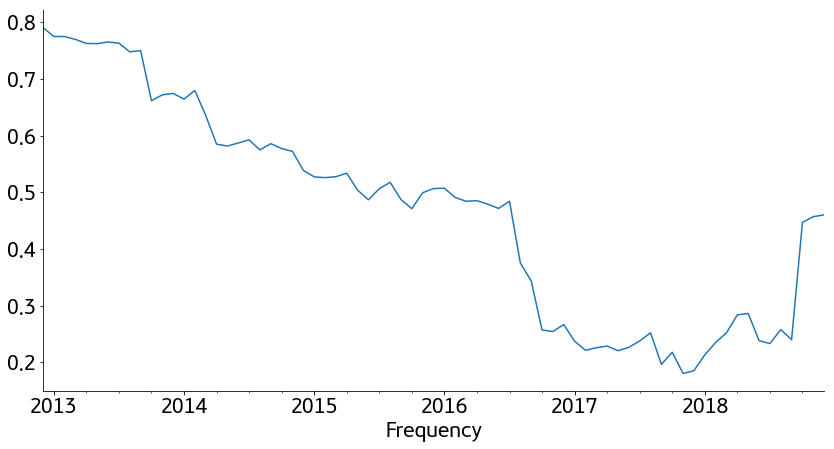

In [162]:
fig, ax = plt.subplots()            

for spine in ['top', 'right']:
    ax.spines[spine].set_color('none')

ax.margins(x=0)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, _: '{:,.00}'.format(y)))

style_monthly_rt['대형주'].rolling(60).corr(style_monthly_rt['소형주']).plot(ax=ax)

In [135]:
style_size_rt = style_rt[['Size', '순수가치', '순수성장', 'Low Vol', 'FnGuide 모멘텀 탑픽지수']]

In [152]:
style_size_rt.head()

,Size,순수가치,순수성장,Low Vol,FnGuide 모멘텀 탑픽지수
Frequency,,,,,
2008-01-02,1.019573,0.974362,0.975547,0.975474,NaN
2008-01-03,1.004011,1.001102,1.002825,0.999641,NaN
2008-01-04,1.006286,1.005172,1.010347,1.003962,NaN
2008-01-05,1.000000,1.000000,1.000000,1.000000,NaN
2008-01-06,1.000000,1.000000,1.000000,1.000000,NaN


In [157]:

##style_size_against_rt = style_size_rt.sub(bm_rt, axis = 0).sub(-1)

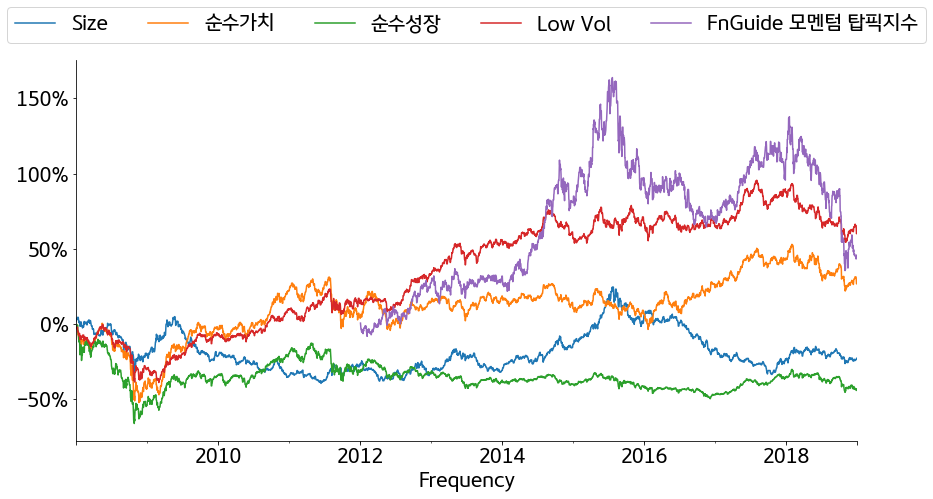

In [150]:
fig, ax = plt.subplots()            

for spine in ['top', 'right']:
    ax.spines[spine].set_color('none')

ax.margins(x=0)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))

style_size_rt.cumprod().sub(1).plot(ax=ax)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), ncol = 5,loc = "lower center")

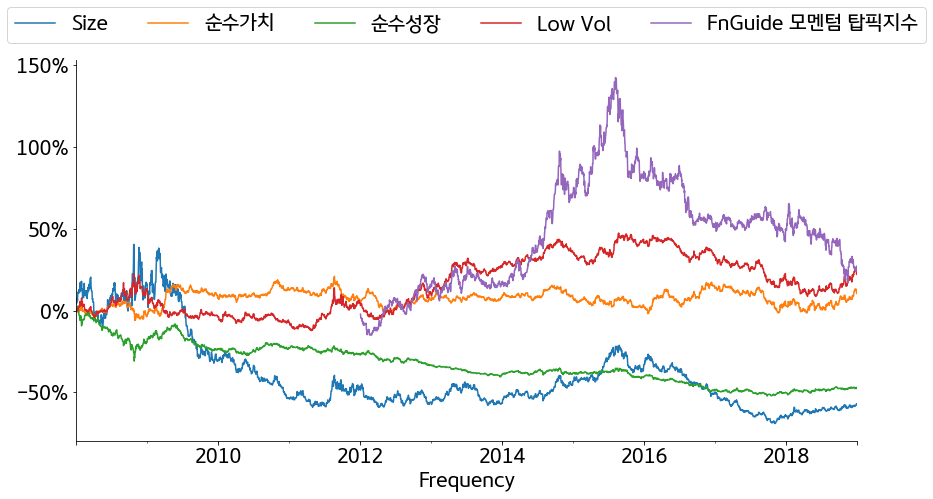

In [158]:
fig, ax = plt.subplots()            

for spine in ['top', 'right']:
    ax.spines[spine].set_color('none')

ax.margins(x=0)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))

style_size_against_rt.cumprod().sub(1).plot(ax=ax)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), ncol = 5,loc = "lower center")

In [151]:
fig, ax = plt.subplots()            

for spine in ['top', 'right']:
    ax.spines[spine].set_color('none')

ax.margins(x=0)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))

style_size_rt.sub(bm_rt).sub(-1).cumprod().sub(1).plot(ax=ax)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), ncol = 5,loc = "lower center")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:3772: RuntimeWarning: Cannot compare type 'Timestamp' with type 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


ValueError: Axis limits cannot be NaN or Inf

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0C133C90> (for post_execute):


ValueError: view limit minimum -0.05 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -0.05 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

## 초과성과

In [57]:
excess_monthly_rt = style_monthly_rt.sub(bm_monthly_rt, axis = 0)
excess_monthly_rt.head()

,순수가치,순수성장,대형주,소형주,Low Vol,FnGuide 모멘텀 탑픽지수
Frequency,,,,,,
2008-01-31,0.025567,-0.078944,0.003602,-0.007861,0.058462,NaN
2008-02-29,-0.053083,0.086152,-0.005608,0.025550,-0.067367,NaN
2008-03-31,-0.005615,-0.034543,0.007643,-0.037340,-0.018636,NaN
2008-04-30,0.029979,-0.046117,0.005851,-0.040117,0.026600,NaN
2008-05-31,-0.004220,-0.024264,-0.001579,0.036843,-0.002949,NaN


## 누적수익률 추이 

### 대형주 VS 소형주

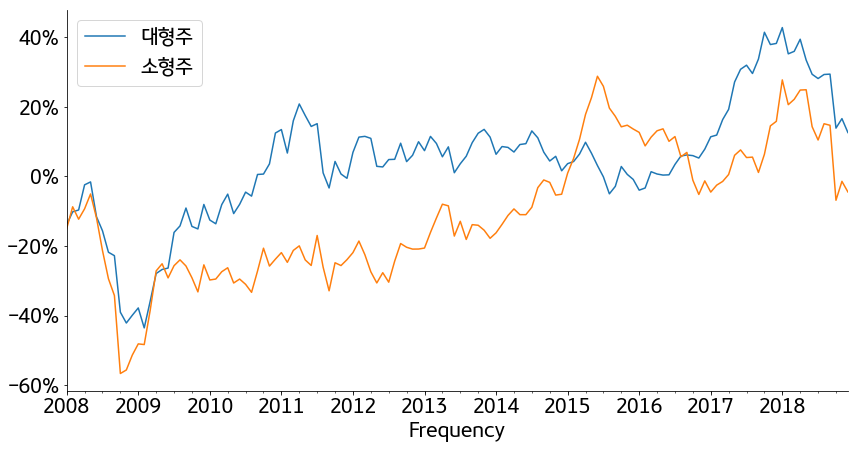

In [78]:
fig, ax = plt.subplots()            

for spine in ['top', 'right']:
    ax.spines[spine].set_color('none')

ax.margins(x=0)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))

month_style_ret[["대형주","소형주"]].cumprod().sub(1).plot(ax=ax)

## Size Factor 

### 소형주 롱, 대형주 숏

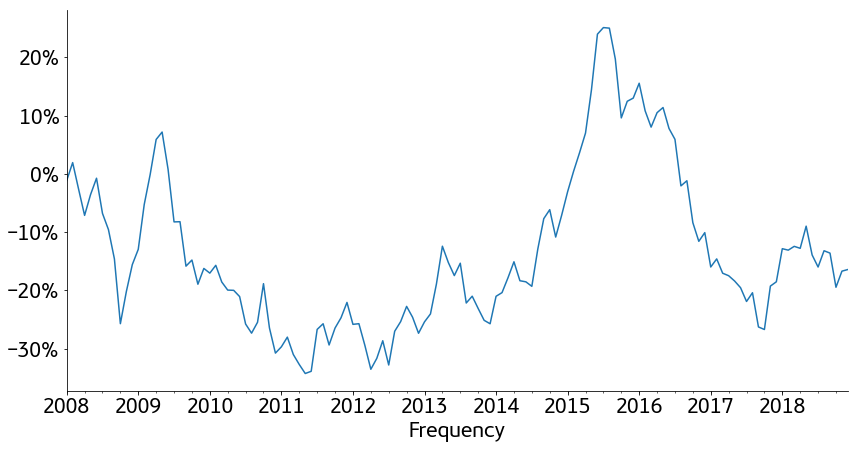

In [80]:
fig, ax = plt.subplots()            

for spine in ['top', 'right']:
    ax.spines[spine].set_color('none')

ax.margins(x=0)
ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))


(month_style_ret["소형주"].sub(month_style_ret["대형주"]).sub(-1)).cumprod().sub(1).plot(ax=ax)

### 연간 수익률

#### 대형주 / 소형주

In [84]:
lg_sm_year = month_style_ret[["대형주","소형주"]].resample('A').prod().sub(1).applymap('{: .2%}'.format)
lg_sm_year

,대형주,소형주
Frequency,,
2008-12-31,-39.91%,-51.35%
2009-12-31,52.97%,53.27%
2010-12-31,22.32%,2.21%
2011-12-31,-11.57%,-0.20%
2012-12-31,10.57%,4.01%
2013-12-31,1.20%,3.90%
2014-12-31,-8.70%,15.40%
2015-12-31,-2.44%,19.74%
2016-12-31,8.77%,-13.11%


In [87]:
(lg_sm_year["대형주"] < lg_sm_year["소형주"])

Frequency
2008-12-31     True
2009-12-31     True
2010-12-31    False
2011-12-31    False
2012-12-31     True
2013-12-31     True
2014-12-31    False
2015-12-31    False
2016-12-31     True
2017-12-31    False
2018-12-31    False
Freq: A-DEC, dtype: bool

In [98]:
print("Winning Rate for Small Stocks is " + '{:.2%}'.format((lg_sm_year["대형주"] < lg_sm_year["소형주"]).sum() / lg_sm_year.shape[0]))

Winning Rate for Small Stocks is 45.45%


## Size Factor 연간성과

In [113]:
## Long-Short

ls_long_short = month_style_ret["소형주"].sub(month_style_ret["대형주"]).sub(-1)
a_ls_long_short = ls_long_short.resample('A').prod().sub(1)
a_ls_long_short.apply('{: .2%}'.format)

Frequency
2008-12-31    -15.59%
2009-12-31     -0.77%
2010-12-31    -17.35%
2011-12-31     12.57%
2012-12-31     -6.79%
2013-12-31      2.25%
2014-12-31     25.09%
2015-12-31     21.65%
2016-12-31    -20.44%
2017-12-31     -9.39%
2018-12-31      2.59%
Freq: A-DEC, dtype: object

In [114]:
a_ls_long_short > 0

Frequency
2008-12-31    False
2009-12-31    False
2010-12-31    False
2011-12-31     True
2012-12-31    False
2013-12-31     True
2014-12-31     True
2015-12-31     True
2016-12-31    False
2017-12-31    False
2018-12-31     True
Freq: A-DEC, dtype: bool

In [121]:
print("Winning Rate for Small Stocks is " + '{:.2%}'.format((a_ls_long_short > 0).sum() / a_ls_long_short.shape[0]))

Winning Rate for Small Stocks is 45.45%


## 사이즈 팩터 초과성과

In [122]:
ls_long_short

Frequency
2008-01-31    0.988537
2008-02-29    1.031158
2008-03-31    0.955017
2008-04-30    0.954032
2008-05-31    1.038423
2008-06-30    1.029132
2008-07-31    0.939162
2008-08-31    0.970189
2008-09-30    0.944358
2008-10-31    0.869753
2008-11-30    1.074107
2008-12-31    1.058045
2009-01-31    1.031159
2009-02-28    1.088342
2009-03-31    1.054648
2009-04-30    1.059988
2009-05-31    1.012032
2009-06-30    0.940281
2009-07-31    0.910457
2009-08-31    1.000325
2009-09-30    0.916905
2009-10-31    1.012467
2009-11-30    0.951254
2009-12-31    1.033438
2010-01-31    0.990390
2010-02-28    1.016192
2010-03-31    0.966020
2010-04-30    0.982936
2010-05-31    0.999491
2010-06-30    0.986561
                ...   
2016-07-31    0.982680
2016-08-31    0.924550
2016-09-30    1.009046
2016-10-31    0.927079
2016-11-30    0.965113
2016-12-31    1.016876
2017-01-31    0.934393
2017-02-28    1.016527
2017-03-31    0.971218
2017-04-30    0.994868
2017-05-31    0.988977
2017-06-30    0.985892
2

## 상관관계

### Fnguide 모멘텀 탑픽지수 고려 (2012-01-31~2018-12-31)

In [58]:
(month_style_ret['2012-01-31':].corr()).applymap('{: .2}'.format)

,순수가치,순수성장,대형주,소형주,Low Vol,FnGuide 모멘텀 탑픽지수
순수가치,1.0,0.73,0.77,0.55,0.73,0.25
순수성장,0.73,1.0,0.78,0.78,0.59,0.47
대형주,0.77,0.78,1.0,0.45,0.6,0.4
소형주,0.55,0.78,0.45,1.0,0.6,0.54
Low Vol,0.73,0.59,0.6,0.6,1.0,0.42
FnGuide 모멘텀 탑픽지수,0.25,0.47,0.4,0.54,0.42,1.0


### Fnguide 모멘텀 탑픽지수 제외 (2008-01-31~2018-12-31)

In [59]:
(month_style_ret.loc[:,:"Low Vol"].corr()).applymap('{: .2}'.format)

,순수가치,순수성장,대형주,소형주,Low Vol
순수가치,1.0,0.86,0.88,0.78,0.84
순수성장,0.86,1.0,0.89,0.86,0.73
대형주,0.88,0.89,1.0,0.71,0.79
소형주,0.78,0.86,0.71,1.0,0.71
Low Vol,0.84,0.73,0.79,0.71,1.0


## Monthly Corr 60 / Rolling 추세

### 소형주 VS Other(순수가치 / 순수성장 / Low Vol / 모멘텀 탑픽)

In [62]:
big_style = month_style_ret.loc[:,'소형주']
style_other = month_style_ret.loc[:,['순수가치', '순수성장', 'Low Vol', 'FnGuide 모멘텀 탑픽지수']]

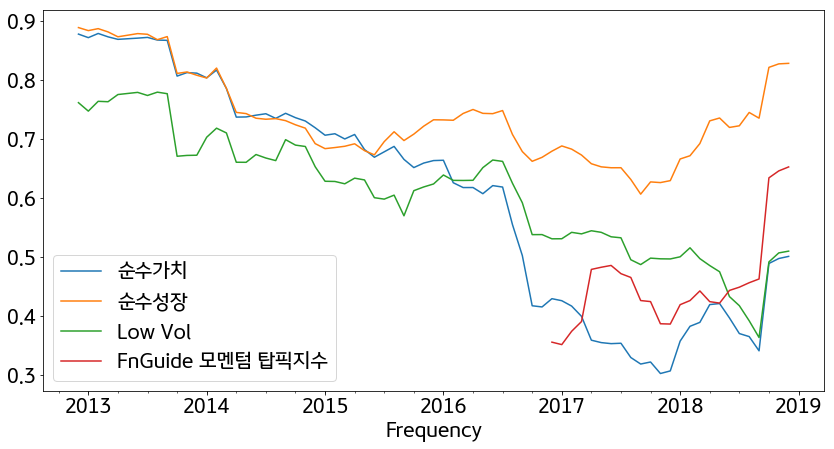

In [63]:
style_other.rolling(60).corr(big_style).plot()

## 연간 수익률

In [55]:
dt_ret["2017-01-01":"2018-12-31"].resample('A').prod().sub(1).applymap('{: .2%}'.format)

,MKF대형,MKF소형,MKF순수가치,MKF순수성장
일자,,,,
2017-12-31,28.17%,17.34%,15.01%,22.01%
2018-12-31,-18.53%,-17.52%,-11.19%,-12.85%


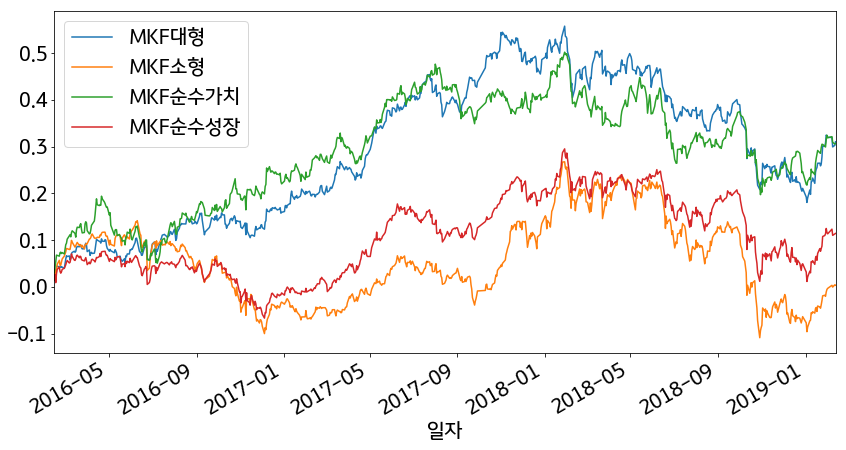

In [50]:
fig, ax = plt.subplots()
(dt_ret.cumprod().sub(1)).plot(ax=ax)